<a href="https://colab.research.google.com/github/masoom-alam/FMML_2024/blob/main/FMML_M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [22]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [24]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [25]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [26]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [27]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [28]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


In [29]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [30]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


In [31]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


In [32]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


In [33]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


#How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
#How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
#What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Fetch dataset
dataset = datasets.fetch_california_housing()
data = dataset.data
label = dataset.target.astype(int)  # Convert to integer for classification

# Split the data
def split(data, label, percent):
    rnd = np.random.default_rng(seed=42).random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    return data[split1], label[split1], data[split2], label[split2]

# Split into training (70%) and validation (30%)
train_data, train_label, val_data, val_label = split(data, label, 0.70)

# Initialize and train classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_label)

# Validate model
val_pred = knn.predict(val_data)
val_accuracy = (val_label == val_pred).mean() * 100
print(f"Validation accuracy with 30% validation set: {val_accuracy:.2f}%")


Validation accuracy with 30% validation set: 33.81%


In [35]:
# Split into training (80%) and validation (20%)
train_data, train_label, val_data, val_label = split(data, label, 0.80)

# Initialize and train classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_label)

# Validate model
val_pred = knn.predict(val_data)
val_accuracy = (val_label == val_pred).mean() * 100
print(f"Validation accuracy with 20% validation set: {val_accuracy:.2f}%")


Validation accuracy with 20% validation set: 34.72%


In [36]:
# Split into training (90%) and validation (10%)
train_data, train_label, val_data, val_label = split(data, label, 0.90)

# Initialize and train classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_label)

# Validate model
val_pred = knn.predict(val_data)
val_accuracy = (val_label == val_pred).mean() * 100
print(f"Validation accuracy with 10% validation set: {val_accuracy:.2f}%")


Validation accuracy with 10% validation set: 35.50%


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, data, label, cv=5)
mean_cv_score = cv_scores.mean() * 100
print(f"Cross-validation accuracy (5 folds): {mean_cv_score:.2f}%")


Cross-validation accuracy (5 folds): 33.23%


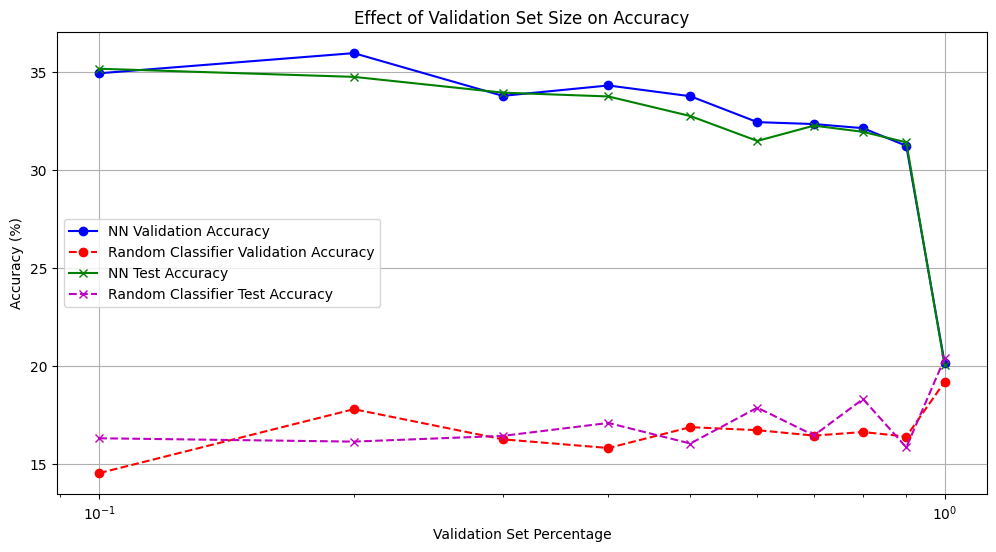

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fetch dataset
dataset = datasets.fetch_california_housing()
data = dataset.data
label = dataset.target.astype(int)  # Convert to integer for classification

# Random seed for reproducibility
rng = np.random.default_rng(seed=42)

def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    return data[split1], label[split1], data[split2], label[split2]

def RandomClassifier(trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
nn_accuracies = []
random_accuracies = []
test_accuracies_nn = []
test_accuracies_random = []

# Split the data into a large training set and a test set
train_data, train_label, test_data, test_label = split(data, label, 0.8)

for percent in percentages:
    # Split the training set into train and validation sets
    traindata, trainlabel, valdata, vallabel = split(train_data, train_label, 1 - percent)

    # Nearest Neighbor Classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(traindata, trainlabel)
    val_pred = knn.predict(valdata)
    nn_accuracy = accuracy_score(vallabel, val_pred)
    nn_accuracies.append(nn_accuracy * 100)

    # Test accuracy with Nearest Neighbor
    test_pred_nn = knn.predict(test_data)
    test_accuracy_nn = accuracy_score(test_label, test_pred_nn)
    test_accuracies_nn.append(test_accuracy_nn * 100)

    # Random Classifier
    val_pred_random = RandomClassifier(trainlabel, valdata)
    random_accuracy = accuracy_score(vallabel, val_pred_random)
    random_accuracies.append(random_accuracy * 100)

    # Test accuracy with Random Classifier
    test_pred_random = RandomClassifier(trainlabel, test_data)
    test_accuracy_random = accuracy_score(test_label, test_pred_random)
    test_accuracies_random.append(test_accuracy_random * 100)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(percentages, nn_accuracies, marker='o', linestyle='-', color='b', label='NN Validation Accuracy')
plt.plot(percentages, random_accuracies, marker='o', linestyle='--', color='r', label='Random Classifier Validation Accuracy')
plt.plot(percentages, test_accuracies_nn, marker='x', linestyle='-', color='g', label='NN Test Accuracy')
plt.plot(percentages, test_accuracies_random, marker='x', linestyle='--', color='m', label='Random Classifier Test Accuracy')

plt.xscale('log')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Effect of Validation Set Size on Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1)Validation Accuracy Trends:
Nearest Neighbor: Generally, as the validation set size increases, the validation accuracy might stabilize, but a larger validation set reduces the training data, potentially lowering the model's ability to learn effectively.
Random Classifier: Validation accuracy is expected to remain relatively constant, as predictions are random. However, a larger validation set provides a more stable measure of this randomness.
2)Test Accuracy Trends:
Nearest Neighbor: Test accuracy should correlate with validation accuracy, but extreme validation set sizes (very small or very large) might cause variability. Too small a validation set might not capture the diversity needed for accurate performance estimation.
Random Classifier: Test accuracy will be similar to validation accuracy and will reflect the inherent randomness. Larger validation sets should give a more stable measure of this randomness.
3)Choosing a Good Percentage:
Balance: A common practice is to reserve around 20% to 30% of the data for validation. This size typically balances having enough data for training while still providing a reliable performance measure.
Extremes: Testing very small or very large validation set sizes will help understand how sensitive your model's performance is to these changes.

#                                                                    #EXERCISE

In [39]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fetch dataset
dataset = datasets.fetch_california_housing()
data = dataset.data
label = dataset.target.astype(int)  # Convert to integer for classification

# Split the data into training and test sets
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)

# Initialize and train 1-Nearest Neighbor classifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_data, train_label)

# Predict on test data with 1-NN
test_pred_nn1 = knn1.predict(test_data)

# Calculate accuracy for 1-NN
test_accuracy_nn1 = accuracy_score(test_label, test_pred_nn1)
print(f"Test accuracy with 1-Nearest Neighbor: {test_accuracy_nn1 * 100:.2f}%")

# Initialize and train 3-Nearest Neighbor classifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_data, train_label)

# Predict on test data with 3-NN
test_pred_nn3 = knn3.predict(test_data)

# Calculate accuracy for 3-NN
test_accuracy_nn3 = accuracy_score(test_label, test_pred_nn3)
print(f"Test accuracy with 3-Nearest Neighbor: {test_accuracy_nn3 * 100:.2f}%")


Test accuracy with 1-Nearest Neighbor: 35.63%
Test accuracy with 3-Nearest Neighbor: 36.24%


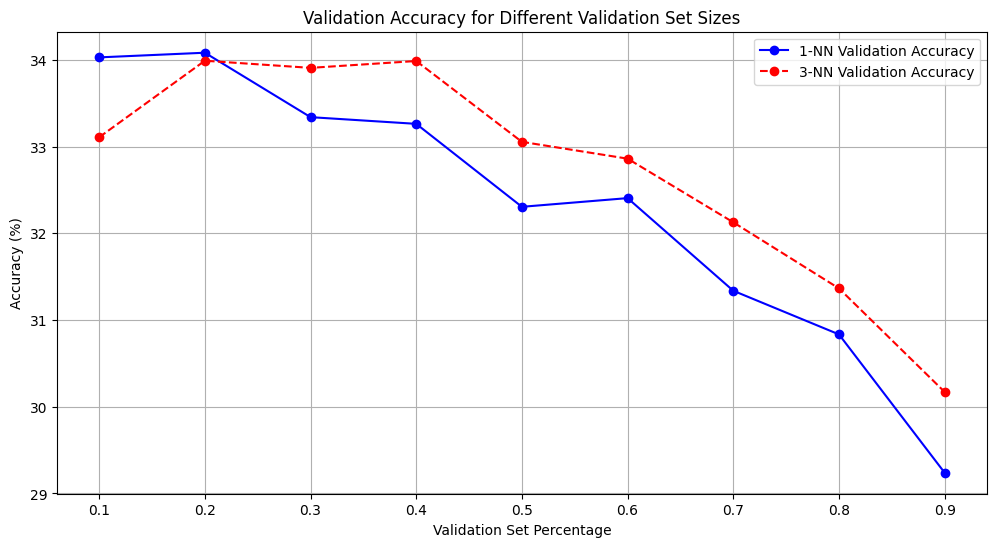

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fetch dataset
dataset = datasets.fetch_california_housing()
data = dataset.data
label = dataset.target.astype(int)  # Convert to integer for classification

def split(data, label, percent):
    rnd = np.random.default_rng(seed=42).random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    return data[split1], label[split1], data[split2], label[split2]

percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nn_accuracies = []
nn3_accuracies = []

# Split the data into a large training set and a test set
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)

for percent in percentages:
    # Split the training set into train and validation sets
    traindata, trainlabel, valdata, vallabel = split(train_data, train_label, 1 - percent)

    # Nearest Neighbor Classifier (1-NN)
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(traindata, trainlabel)
    val_pred_nn1 = knn1.predict(valdata)
    nn_accuracy = accuracy_score(vallabel, val_pred_nn1)
    nn_accuracies.append(nn_accuracy * 100)

    # 3-Nearest Neighbor Classifier (3-NN)
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(traindata, trainlabel)
    val_pred_nn3 = knn3.predict(valdata)
    nn3_accuracy = accuracy_score(vallabel, val_pred_nn3)
    nn3_accuracies.append(nn3_accuracy * 100)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(percentages, nn_accuracies, marker='o', linestyle='-', color='b', label='1-NN Validation Accuracy')
plt.plot(percentages, nn3_accuracies, marker='o', linestyle='--', color='r', label='3-NN Validation Accuracy')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy for Different Validation Set Sizes')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
from sklearn.model_selection import cross_val_score

# Initialize classifiers
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
scores_nn1 = cross_val_score(knn1, data, label, cv=5)
scores_nn3 = cross_val_score(knn3, data, label, cv=5)

print(f"Cross-validation accuracy for 1-NN: {scores_nn1.mean() * 100:.2f}%")
print(f"Cross-validation accuracy for 3-NN: {scores_nn3.mean() * 100:.2f}%")


Cross-validation accuracy for 1-NN: 32.78%
Cross-validation accuracy for 3-NN: 33.23%


#Multiple Splits

In [42]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [44]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 34.27379784102062 %
Test accuracy: 34.91795366795367 %


#QUESTIONS

1)Averaging the validation accuracy across multiple splits, as done with cross-validation, typically provides a more consistent and reliable estimate of model performance. This is because:

Reduction in Variance: Cross-validation reduces the impact of random fluctuations in any single validation split by averaging results over multiple splits.
Comprehensive Evaluation: It provides a more comprehensive evaluation by using different subsets of data for training and validation.

2)Averaging validation accuracies across multiple folds can provide a better estimate of the model's generalization ability. However, it is still not a direct measure of test accuracy. Cross-validation gives an estimate of how the model will perform on unseen data but does not replace the need for a separate test set to evaluate final performance.



3)Increasing the number of iterations (or folds in cross-validation) generally provides a more reliable estimate of model performance:

More Folds: Using more folds (e.g., k=10 instead of k=5) increases the number of validation splits, which can give a more accurate estimate of performance.
Trade-Off: There is a trade-off in computational cost. More folds mean more training runs, which can be computationally expensive.

4)For very small datasets:

Increasing Iterations/Folds: Cross-validation with more folds (e.g., leave-one-out cross-validation) helps by using almost all data for training and provides multiple estimates of model performance. This approach is particularly useful when data is limited.
Trade-Off: While increasing the number of folds can give a better estimate, it also increases computational overhead and can still suffer from variability due to the small size of the dataset.

#EXERCISE

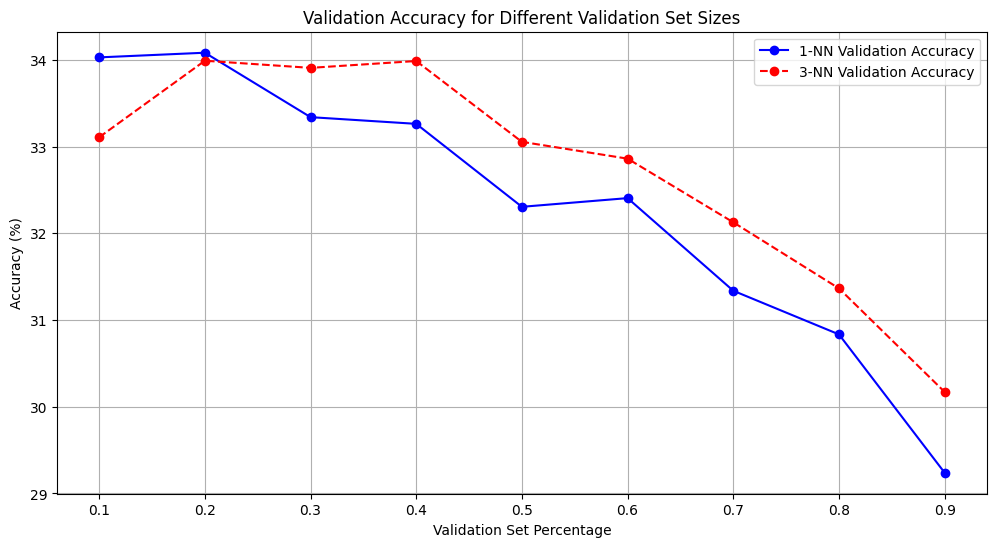

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fetch dataset
dataset = datasets.fetch_california_housing()
data = dataset.data
label = dataset.target.astype(int)  # Convert to integer for classification

def split(data, label, percent):
    rnd = np.random.default_rng(seed=42).random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    return data[split1], label[split1], data[split2], label[split2]

percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nn_accuracies = []
nn3_accuracies = []

# Split the data into a large training set and a test set
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)

for percent in percentages:
    # Split the training set into train and validation sets
    traindata, trainlabel, valdata, vallabel = split(train_data, train_label, 1 - percent)

    # 1-Nearest Neighbor Classifier
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(traindata, trainlabel)
    val_pred_nn1 = knn1.predict(valdata)
    nn_accuracy = accuracy_score(vallabel, val_pred_nn1)

    # 3-Nearest Neighbor Classifier
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(traindata, trainlabel)
    val_pred_nn3 = knn3.predict(valdata)
    nn3_accuracy = accuracy_score(vallabel, val_pred_nn3)

    nn_accuracies.append(nn_accuracy * 100)
    nn3_accuracies.append(nn3_accuracy * 100)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(percentages, nn_accuracies, marker='o', linestyle='-', color='b', label='1-NN Validation Accuracy')
plt.plot(percentages, nn3_accuracies, marker='o', linestyle='--', color='r', label='3-NN Validation Accuracy')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy for Different Validation Set Sizes')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
from sklearn.model_selection import KFold, cross_val_score

folds = [5, 10, 15]  # Different numbers of folds to try

for num_folds in folds:
    print(f"\nNumber of Folds: {num_folds}")

    # Initialize classifiers
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn3 = KNeighborsClassifier(n_neighbors=3)

    # Cross-validation
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    scores_nn1 = cross_val_score(knn1, data, label, cv=cv, scoring='accuracy')
    scores_nn3 = cross_val_score(knn3, data, label, cv=cv, scoring='accuracy')

    print(f"1-NN Cross-validation accuracy with {num_folds} folds: {scores_nn1.mean() * 100:.2f}%")
    print(f"3-NN Cross-validation accuracy with {num_folds} folds: {scores_nn3.mean() * 100:.2f}%")



Number of Folds: 5
1-NN Cross-validation accuracy with 5 folds: 34.77%
3-NN Cross-validation accuracy with 5 folds: 34.95%

Number of Folds: 10
1-NN Cross-validation accuracy with 10 folds: 35.29%
3-NN Cross-validation accuracy with 10 folds: 35.31%

Number of Folds: 15
1-NN Cross-validation accuracy with 15 folds: 35.21%
3-NN Cross-validation accuracy with 15 folds: 35.52%
